c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Red Neuronal MLP:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       102
           1       0.98      0.98      0.98       162

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264

Accuracy: 0.9696969696969697


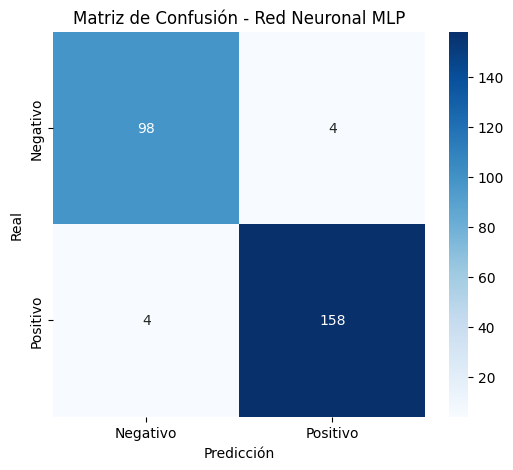

c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

Accuracy (Cross-Val): 0.9715902964959569


c:\Users\eliut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


['modelos\\modelo_mlp.pkl']

In [1]:
# Librerías
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Configuración para visualizar dataframes completos
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# 1. Leer dataset
df = pd.read_csv('dataset_final.csv')

# 2. Definir columnas predictoras y objetivo
columnas_numericas = ['Age', 'CK-MB_log', 'Troponin_log']
columna_objetivo = 'Result'

X = df[columnas_numericas]
y = df[columna_objetivo]

# 3. Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Entrenamiento del modelo MLP
modelo_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
modelo_mlp.fit(X_train_scaled, y_train)

# 6. Predicciones
y_pred_mlp = modelo_mlp.predict(X_test_scaled)

# 7. Evaluación
print("Red Neuronal MLP:")
print(classification_report(y_test, y_pred_mlp))
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", acc_mlp)

# 8. Matriz de confusión
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='g', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión - Red Neuronal MLP")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 9. Validación cruzada
scores_mlp = cross_val_score(modelo_mlp, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Accuracy (Cross-Val):", scores_mlp.mean())

# 10. Guardar el modelo
ruta_modelo = os.path.join('modelos', 'modelo_mlp.pkl')
joblib.dump(modelo_mlp, ruta_modelo)


In [2]:
joblib.dump(X_test_scaled, 'modelos/X_test_scaled.pkl')           # NUEVO
joblib.dump(y_test, 'modelos/y_test.pkl')  

['modelos/y_test.pkl']